In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
import statistics
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader

In [2]:
df = pd.read_csv('fama_french_3_data/AAPL.csv')
ff_factors = pd.read_csv('fama_french_3_data/famafrench_daily_factor.csv')
risk_free_rate = pd.read_csv('fama_french_3_data/^TNX.csv')
ff_factors.drop(['Date_str'], axis=1, inplace=True)
df = df.set_index('Date')
ff_factors = ff_factors.set_index('Date')
risk_free_rate = risk_free_rate.set_index('Date')

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481125,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203232,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.489639,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.610214,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.777847,86709100


In [3]:
df = df.join(risk_free_rate['Adj Close'], rsuffix=' Risk Free')

df.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Risk Free
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481125,104487900,1.628
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203232,99310400,1.668
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.489639,94537600,1.705
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.610214,96904000,1.733
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.777847,86709100,1.771


In [4]:
# YEAR_DAYS = 252
# df['Daily_return'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
# df['Daily_return'].fillna(0, inplace=True)
# df['Excess_return'] = ((df['Daily_return'].rolling(window=YEAR_DAYS).mean() * YEAR_DAYS).apply(lambda x: np.exp(x)) - 1) - df['Adj Close Risk Free']/100

In [5]:
YEAR_DAYS = 250
daily_returns = df['Adj Close'].pct_change().dropna()
df['Excess_return'] = ((daily_returns.rolling(window=YEAR_DAYS).mean() + 1) ** YEAR_DAYS - 1) - df['Adj Close Risk Free']/100

df.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Risk Free,Excess_return
Date,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481125,104487900,1.628,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203232,99310400,1.668,NaN
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.489639,94537600,1.705,NaN
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.610214,96904000,1.733,NaN
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.777847,86709100,1.771,NaN


In [6]:
ff_factors

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.10,-0.25,-0.27,0.009
1926-07-02,0.45,-0.33,-0.06,0.009
1926-07-06,0.17,0.30,-0.39,0.009
1926-07-07,0.09,-0.58,0.02,0.009
1926-07-08,0.21,-0.38,0.19,0.009
...,...,...,...,...
2024-05-24,0.72,0.03,0.16,0.020
2024-05-28,-0.04,0.28,-0.90,0.020
2024-05-29,-0.77,-0.29,-0.62,0.020


In [7]:
df = df.join(ff_factors)

df.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Risk Free,Excess_return,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481125,104487900,1.628,NaN,0.73,0.34,0.78,0.0
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203232,99310400,1.668,NaN,-0.29,-0.82,3.63,0.0
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.489639,94537600,1.705,NaN,-2.28,-1.46,2.60,0.0
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.610214,96904000,1.733,NaN,0.00,0.20,1.75,0.0
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.777847,86709100,1.771,NaN,-0.48,-1.32,2.02,0.0


In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close Risk Free,Excess_return,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481125,104487900,1.628,NaN,0.73,0.34,0.78,0.0
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203232,99310400,1.668,NaN,-0.29,-0.82,3.63,0.0
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.489639,94537600,1.705,NaN,-2.28,-1.46,2.60,0.0
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.610214,96904000,1.733,NaN,0.00,0.20,1.75,0.0
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.777847,86709100,1.771,NaN,-0.48,-1.32,2.02,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19,224.820007,226.800003,223.279999,224.309998,224.309998,49151500,4.239,0.162322,NaN,NaN,NaN,NaN
2024-07-22,227.009995,227.779999,223.089996,223.960007,223.960007,48201800,4.260,0.155174,NaN,NaN,NaN,NaN
2024-07-23,224.369995,226.940002,222.679993,225.009995,225.009995,39960300,4.239,0.155593,NaN,NaN,NaN,NaN


In [9]:
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Risk Free,Excess_return,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,
2022-12-30,128.410004,129.949997,127.430000,129.929993,128.868332,77034200,3.879,-0.274279,-0.22,0.12,-0.03,0.016
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500,3.793,-0.292102,-0.47,0.07,-0.12,0.017
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327499,89113600,3.709,-0.263185,0.81,0.54,0.05,0.017
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998444,80962700,3.720,-0.258563,-1.14,-0.18,1.21,0.017
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,3.569,-0.228642,2.21,-0.06,0.04,0.017
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24,188.820007,190.580002,188.039993,189.979996,189.979996,36294600,4.467,0.066512,0.72,0.03,0.16,0.020
2024-05-28,191.509995,193.000000,189.100006,189.990005,189.990005,52280100,4.542,0.054043,-0.04,0.28,-0.90,0.020
2024-05-29,189.610001,192.250000,189.509995,190.289993,190.289993,53068000,4.624,0.055270,-0.77,-0.29,-0.62,0.020


fama french model 

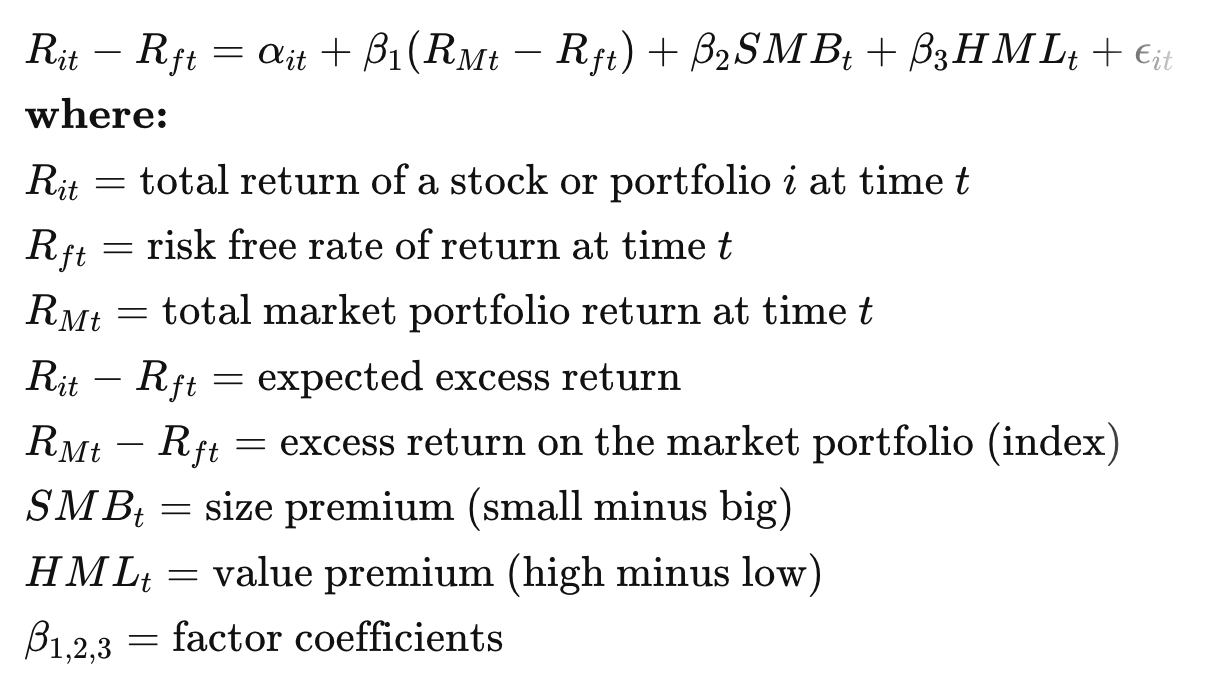

target-features

y = Excess_return
x1 = Mkt-Rf
x2 = SMB
x3 = HML

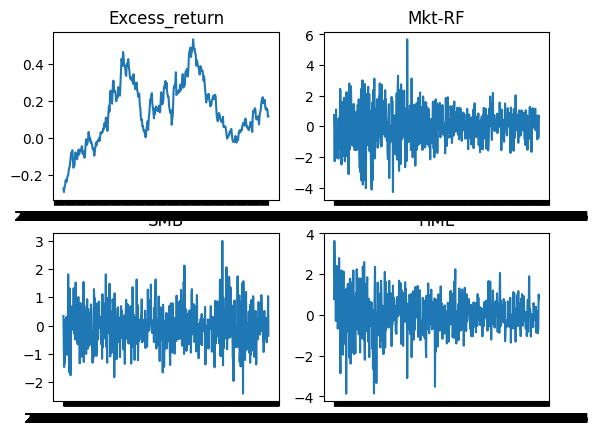

In [10]:
plt.subplot(2,2,1)
plt.plot(df['Excess_return'])
plt.title('Excess_return')

plt.subplot(2,2,2)
plt.plot(df['Mkt-RF'])
plt.title('Mkt-RF')

plt.subplot(2,2,3)
plt.plot(df['SMB'])
plt.title('SMB')

plt.subplot(2,2,4)
plt.plot(df['HML'])
plt.title('HML')

plt.show()

In [11]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close Risk Free,Excess_return,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,
2022-12-30,128.410004,129.949997,127.430000,129.929993,128.868332,77034200,3.879,-0.274279,-0.22,0.12,-0.03,0.016
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500,3.793,-0.292102,-0.47,0.07,-0.12,0.017
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327499,89113600,3.709,-0.263185,0.81,0.54,0.05,0.017
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998444,80962700,3.720,-0.258563,-1.14,-0.18,1.21,0.017
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,3.569,-0.228642,2.21,-0.06,0.04,0.017
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24,188.820007,190.580002,188.039993,189.979996,189.979996,36294600,4.467,0.066512,0.72,0.03,0.16,0.020
2024-05-28,191.509995,193.000000,189.100006,189.990005,189.990005,52280100,4.542,0.054043,-0.04,0.28,-0.90,0.020
2024-05-29,189.610001,192.250000,189.509995,190.289993,190.289993,53068000,4.624,0.055270,-0.77,-0.29,-0.62,0.020


In [52]:
# dataset class
import torch
from torch.utils.data import Dataset, DataLoader

class FCN_dataset(Dataset):
    def __init__(self, df, split_type):
        self.df = df
        self.dates = df.index
        self.y = df['Excess_return']
        self.X = df[["Mkt-RF",	"SMB", "HML"]]
        
        self.y = self.y.to_numpy()
        self.X = self.X.to_numpy()
        
        # normalise the X
        # Double check that this function normalises each column to its own
        scaler = MinMaxScaler(feature_range=(-1, 1))
        self.X = scaler.fit_transform(self.X)
        
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.float32)

        # split into train val test
        train_size,val_size,test_size=0.7,0.2,0.1
        if split_type=='train':
            self.X = self.X[:int(len(df)*train_size)]
            self.y = self.y[:int(len(df)*train_size)]
        elif split_type=='val':
            self.X = self.X[int(len(df)*train_size):int(len(df)*train_size)+int(len(df)*val_size)]
            self.y = self.y[int(len(df)*train_size):int(len(df)*train_size)+int(len(df)*val_size)]
        elif split_type=='test':
            self.X = self.X[int(len(df)*train_size)+int(len(df)*val_size):]
            self.y = self.y[int(len(df)*train_size)+int(len(df)*val_size):]
        
    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx],self.y[idx]


In [53]:
train_dataset = FCN_dataset(df=df,split_type='train')
val_dataset = FCN_dataset(df=df,split_type='val')
test_dataset = FCN_dataset(df=df,split_type='test')

print(train_dataset.X.shape,val_dataset.X.shape,test_dataset.X.shape)
print(train_dataset.y.shape,val_dataset.y.shape,test_dataset.y.shape)

torch.Size([249, 3]) torch.Size([71, 3]) torch.Size([36, 3])
torch.Size([249]) torch.Size([71]) torch.Size([36])


In [54]:
249+71+36,len(df)

(356, 356)

In [55]:
val_dataset.y[:].min(),val_dataset.y[:].max()

(tensor(-0.0031), tensor(0.4942))

In [56]:
val_dataset.X[:].min(),val_dataset.X[:].max()

(tensor(-1.), tensor(0.9130))

In [57]:
train_dataset[0]

(tensor([-0.1121, -0.0649,  0.2118]), tensor(-0.2743))

In [58]:
# dataloader
batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, drop_last=True) # set all shuffle=False since its sequential data
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)


# print to check
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 3]) torch.Size([16])


# FCN 1

In [59]:
# model class

import torch.nn as nn
import torch.nn.functional as F

class SimpleFCN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        # input_size = num features
        super(SimpleFCN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # print(x.shape)
        x = F.relu(self.fc1(x))
        # print(x.shape)
        x = self.fc2(x)
        return x
    
# fcn_model = SimpleFCN(input_size=3, hidden_size=16, output_size=1)
# fcn_model(train_dataset[0][0])
# fcn_model(x_batch)

In [60]:
# define model inputs

device = torch.device('cpu')

# input_size = 1 # equal to num features
# hidden_size = 31
# num_stacked_layers = 2
lr= 1e-3
epochs = 100

scheduler_factor=0.5
scheduler_patience=3

early_stopping_limit = 10

epoch 0
model epoch 0 saved as simple_fcn.pt
Epoch 1/100, train loss: 0.0398, val loss: 0.0420, time_taken: 0.0
epoch 1
model epoch 1 saved as simple_fcn.pt
Epoch 2/100, train loss: 0.0355, val loss: 0.0371, time_taken: 0.0
epoch 2
model epoch 2 saved as simple_fcn.pt
Epoch 3/100, train loss: 0.0338, val loss: 0.0333, time_taken: 0.0
epoch 3
model epoch 3 saved as simple_fcn.pt
Epoch 4/100, train loss: 0.0329, val loss: 0.0309, time_taken: 0.0
epoch 4
model epoch 4 saved as simple_fcn.pt
Epoch 5/100, train loss: 0.0324, val loss: 0.0294, time_taken: 0.0
epoch 5
model epoch 5 saved as simple_fcn.pt
Epoch 6/100, train loss: 0.0320, val loss: 0.0284, time_taken: 0.0
epoch 6
model epoch 6 saved as simple_fcn.pt
Epoch 7/100, train loss: 0.0316, val loss: 0.0279, time_taken: 0.0
epoch 7
model epoch 7 saved as simple_fcn.pt
Epoch 8/100, train loss: 0.0313, val loss: 0.0275, time_taken: 0.0
epoch 8
model epoch 8 saved as simple_fcn.pt
Epoch 9/100, train loss: 0.0310, val loss: 0.0272, time_tak

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


model epoch 24 saved as simple_fcn.pt
Epoch 25/100, train loss: 0.0286, val loss: 0.0263, time_taken: 0.0
epoch 25
model epoch 25 saved as simple_fcn.pt
Epoch 26/100, train loss: 0.0285, val loss: 0.0263, time_taken: 0.0
epoch 26
model epoch 26 saved as simple_fcn.pt
Epoch 27/100, train loss: 0.0285, val loss: 0.0263, time_taken: 0.0
epoch 27
model epoch 27 saved as simple_fcn.pt
Epoch 28/100, train loss: 0.0284, val loss: 0.0263, time_taken: 0.0
epoch 28
model epoch 28 saved as simple_fcn.pt
Epoch 29/100, train loss: 0.0283, val loss: 0.0263, time_taken: 0.0
epoch 29
model epoch 29 saved as simple_fcn.pt
Epoch 30/100, train loss: 0.0283, val loss: 0.0263, time_taken: 0.0
epoch 30
Epoch 31/100, train loss: 0.0282, val loss: 0.0263, time_taken: 0.0
epoch 31
Epoch 32/100, train loss: 0.0281, val loss: 0.0263, time_taken: 0.0
epoch 32
Epoch 33/100, train loss: 0.0279, val loss: 0.0263, time_taken: 0.0
epoch 33
Epoch 34/100, train loss: 0.0278, val loss: 0.0264, time_taken: 0.0
epoch 34
Ep

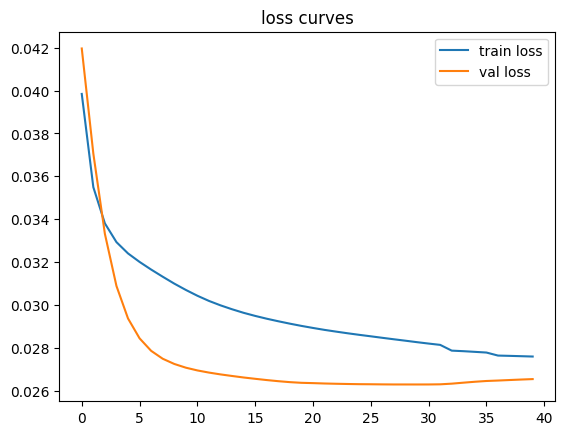

In [61]:
# Train the model

from torch.optim.lr_scheduler import ReduceLROnPlateau
import time

criterion = nn.MSELoss()
# model = RNN(
#     input_size=input_size,
#     hidden_size=hidden_size,
#     num_stacked_layers=num_stacked_layers
# ).to(device)

fcn_model = SimpleFCN(input_size=3, hidden_size=16, output_size=1)
model = fcn_model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = ReduceLROnPlateau(optimizer, 'min', factor=scheduler_factor, patience=scheduler_patience)

epochs = epochs
early_stop_count = 0
min_val_loss = float('inf')

train_losses=[]
val_losses=[]


for epoch in range(epochs):
    epoch_start_time = time.time()
    print(f'epoch {epoch}')
    model.train()

    train_running_loss = []
    for batch in train_loader:
        x_batch, y_batch = batch
        # x_batch, y_batch = x_batch, y_batch.reshape(-1,1)
        y_batch = y_batch.reshape(-1,1)
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        train_running_loss.append(loss.item())
        loss.backward()
        optimizer.step()

    train_loss = np.mean(train_running_loss)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_running_loss = []
    with torch.no_grad():
        for batch in val_loader:
            x_batch, y_batch = batch
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            val_running_loss.append(loss.item())

    val_loss = np.mean(val_running_loss)
    val_losses.append(val_loss)

    scheduler.step(val_loss)

    if val_loss < min_val_loss:
        min_val_loss = val_loss
        torch.save(model.state_dict(), 'simple_fcn.pt')
        print(f'model epoch {epoch} saved as simple_fcn.pt')
        early_stop_count = 0
    else:
        early_stop_count += 1

    if early_stop_count >= early_stopping_limit:
        print("Early stopping!")
        break

    time_taken = round(time.time()-epoch_start_time,1)
    print(f"Epoch {epoch + 1}/{epochs}, train loss: {train_loss:.4f}, val loss: {val_loss:.4f}, time_taken: {time_taken}")
    

# plot train val loss curves

import matplotlib.pyplot as plt

plt.plot(train_losses,label='train loss')
plt.plot(val_losses,label='val loss')
plt.title("loss curves")
plt.legend()
plt.show()


In [62]:
test_dataset.y.shape

torch.Size([36])

0.010773 0.094857


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([36])) that is different to the input size (torch.Size([36, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([36])) that is different to the input size (torch.Size([36, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


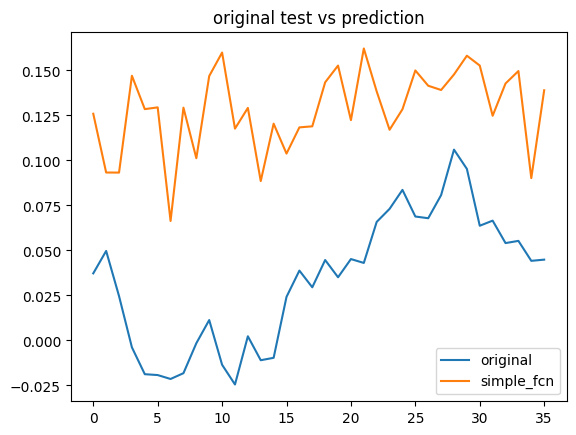

In [63]:
# PLOT EVAL ON TEST DATASET

X_test = test_dataset.X
y_test = test_dataset.y
# X_test

# load best pretraining model
best_model_path = 'simple_fcn.pt'
# rnn_model = RNN(
#     input_size=input_size,
#     hidden_size=hidden_size,
#     num_stacked_layers=num_stacked_layers
# ).to(device)
fcn_model = SimpleFCN(input_size=3, hidden_size=16, output_size=1)

fcn_model.load_state_dict(torch.load(best_model_path,map_location=device))
fcn_model.eval()

# latent_vector = pretraining_model.get_latent_vector(X_test.to(device))
predictions = fcn_model(X_test.to(device))
mse_loss = nn.MSELoss()(predictions.cpu().detach(),y_test.cpu().detach())
mae_loss = nn.L1Loss()(predictions.cpu().detach(),y_test.cpu().detach())
mse_loss = round(mse_loss.item(),6)
mae_loss = round(mae_loss.item(),6)
print(mse_loss,mae_loss)

# plot forecasting prediction
y = y_test.cpu().detach()
pred = predictions.cpu().detach()

# plt.plot(y[:100],label='original')
# plt.plot(pred[:100],label='rnn')
plt.plot(y,label='original')
plt.plot(pred,label='simple_fcn')

plt.title('original test vs prediction')
plt.legend()
plt.show()

# FCN 2

In [64]:
# model class

import torch.nn as nn
import torch.nn.functional as F

class SimpleFCN(nn.Module):
    def __init__(self):
        # input_size = num features
        super(SimpleFCN, self).__init__()
        # self.fc1 = nn.Linear(3, 16)
        # self.fc2 = nn.Linear(16, )
        
        self.fcn = nn.Sequential(
            nn.Linear(3, 16),
            nn.ReLU(),
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
        )


    def forward(self, x):
        # print(x.shape)
        # x = F.relu(self.fc1(x))
        # print(x.shape)
        # x = self.fc2(x)
        x = self.fcn(x)
        return x
    
# fcn_model = SimpleFCN(input_size=3, hidden_size=16, output_size=1)
# fcn_model(train_dataset[0][0])
# fcn_model(x_batch)

In [65]:
# define model inputs

device = torch.device('cpu')

# input_size = 1 # equal to num features
# hidden_size = 31
# num_stacked_layers = 2
lr= 1e-3
epochs = 100

scheduler_factor=0.5
scheduler_patience=3

early_stopping_limit = 10

epoch 0
model epoch 0 saved as simple_fcn.pt
Epoch 1/100, train loss: 0.0632, val loss: 0.0759, time_taken: 0.0
epoch 1
model epoch 1 saved as simple_fcn.pt
Epoch 2/100, train loss: 0.0347, val loss: 0.0381, time_taken: 0.0
epoch 2
model epoch 2 saved as simple_fcn.pt
Epoch 3/100, train loss: 0.0280, val loss: 0.0251, time_taken: 0.0
epoch 3
model epoch 3 saved as simple_fcn.pt
Epoch 4/100, train loss: 0.0312, val loss: 0.0248, time_taken: 0.0
epoch 4
Epoch 5/100, train loss: 0.0317, val loss: 0.0264, time_taken: 0.0
epoch 5
Epoch 6/100, train loss: 0.0309, val loss: 0.0270, time_taken: 0.0
epoch 6
Epoch 7/100, train loss: 0.0304, val loss: 0.0268, time_taken: 0.0
epoch 7
Epoch 8/100, train loss: 0.0302, val loss: 0.0267, time_taken: 0.0
epoch 8
Epoch 9/100, train loss: 0.0294, val loss: 0.0268, time_taken: 0.0
epoch 9
Epoch 10/100, train loss: 0.0293, val loss: 0.0270, time_taken: 0.0
epoch 10
Epoch 11/100, train loss: 0.0291, val loss: 0.0271, time_taken: 0.0
epoch 11
Epoch 12/100, t

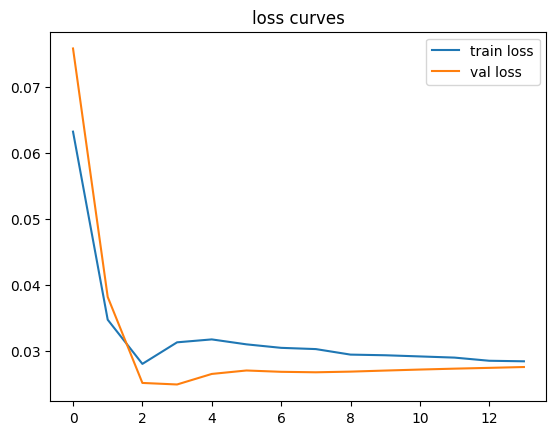

In [70]:
# Train the model

from torch.optim.lr_scheduler import ReduceLROnPlateau
import time

criterion = nn.MSELoss()
# model = RNN(
#     input_size=input_size,
#     hidden_size=hidden_size,
#     num_stacked_layers=num_stacked_layers
# ).to(device)

fcn_model = SimpleFCN()
model = fcn_model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = ReduceLROnPlateau(optimizer, 'min', factor=scheduler_factor, patience=scheduler_patience)

epochs = epochs
early_stop_count = 0
min_val_loss = float('inf')

train_losses=[]
val_losses=[]


for epoch in range(epochs):
    epoch_start_time = time.time()
    print(f'epoch {epoch}')
    model.train()

    train_running_loss = []
    for batch in train_loader:
        x_batch, y_batch = batch
        # x_batch, y_batch = x_batch, y_batch.reshape(-1,1)
        y_batch = y_batch.reshape(-1,1)
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        train_running_loss.append(loss.item())
        loss.backward()
        optimizer.step()

    train_loss = np.mean(train_running_loss)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_running_loss = []
    with torch.no_grad():
        for batch in val_loader:
            x_batch, y_batch = batch
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            val_running_loss.append(loss.item())

    val_loss = np.mean(val_running_loss)
    val_losses.append(val_loss)

    scheduler.step(val_loss)

    if val_loss < min_val_loss:
        min_val_loss = val_loss
        torch.save(model.state_dict(), 'simple_fcn.pt')
        print(f'model epoch {epoch} saved as simple_fcn.pt')
        early_stop_count = 0
    else:
        early_stop_count += 1

    if early_stop_count >= early_stopping_limit:
        print("Early stopping!")
        break

    time_taken = round(time.time()-epoch_start_time,1)
    print(f"Epoch {epoch + 1}/{epochs}, train loss: {train_loss:.4f}, val loss: {val_loss:.4f}, time_taken: {time_taken}")
    

# plot train val loss curves

import matplotlib.pyplot as plt

plt.plot(train_losses,label='train loss')
plt.plot(val_losses,label='val loss')
plt.title("loss curves")
plt.legend()
plt.show()


In [71]:
test_dataset.y.shape

torch.Size([36])

0.013542 0.110346


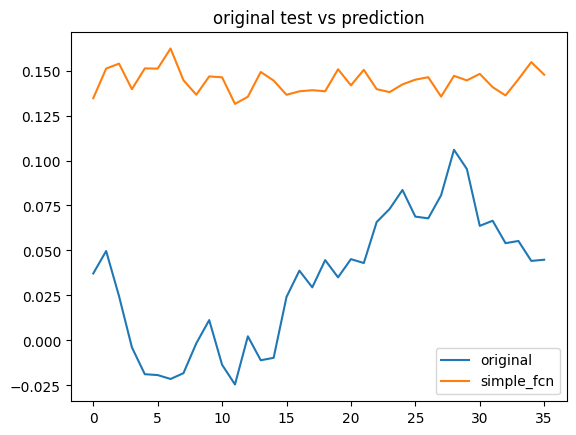

In [72]:
# PLOT EVAL ON TEST DATASET

X_test = test_dataset.X
y_test = test_dataset.y
# X_test

# load best pretraining model
best_model_path = 'simple_fcn.pt'
# rnn_model = RNN(
#     input_size=input_size,
#     hidden_size=hidden_size,
#     num_stacked_layers=num_stacked_layers
# ).to(device)
fcn_model = SimpleFCN()

fcn_model.load_state_dict(torch.load(best_model_path,map_location=device))
fcn_model.eval()

# latent_vector = pretraining_model.get_latent_vector(X_test.to(device))
predictions = fcn_model(X_test.to(device))
mse_loss = nn.MSELoss()(predictions.cpu().detach(),y_test.cpu().detach())
mae_loss = nn.L1Loss()(predictions.cpu().detach(),y_test.cpu().detach())
mse_loss = round(mse_loss.item(),6)
mae_loss = round(mae_loss.item(),6)
print(mse_loss,mae_loss)

# plot forecasting prediction
y = y_test.cpu().detach()
pred = predictions.cpu().detach()

# plt.plot(y[:100],label='original')
# plt.plot(pred[:100],label='rnn')
plt.plot(y,label='original')
plt.plot(pred,label='simple_fcn')

plt.title('original test vs prediction')
plt.legend()
plt.show()

# functions

In [80]:
# Train the model

def train():
    criterion = nn.MSELoss()
    # model = RNN(
    #     input_size=input_size,
    #     hidden_size=hidden_size,
    #     num_stacked_layers=num_stacked_layers
        # ).to(device)

    fcn_model = SimpleFCN()
    model = fcn_model.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = ReduceLROnPlateau(optimizer, 'min', factor=scheduler_factor, patience=scheduler_patience)

    # epochs = epochs
    early_stop_count = 0
    min_val_loss = float('inf')

    train_losses=[]
    val_losses=[]


    for epoch in range(epochs):
        epoch_start_time = time.time()
        print(f'epoch {epoch}')
        model.train()

        train_running_loss = []
        for batch in train_loader:
            x_batch, y_batch = batch
            # x_batch, y_batch = x_batch, y_batch.reshape(-1,1)
            y_batch = y_batch.reshape(-1,1)
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            train_running_loss.append(loss.item())
            loss.backward()
            optimizer.step()

        train_loss = np.mean(train_running_loss)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        val_running_loss = []
        with torch.no_grad():
            for batch in val_loader:
                x_batch, y_batch = batch
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)
                outputs = model(x_batch)
                loss = criterion(outputs, y_batch)
                val_running_loss.append(loss.item())

        val_loss = np.mean(val_running_loss)
        val_losses.append(val_loss)

        scheduler.step(val_loss)

        if val_loss < min_val_loss:
            min_val_loss = val_loss
            torch.save(model.state_dict(), 'simple_fcn.pt')
            print(f'model epoch {epoch} saved as simple_fcn.pt')
            early_stop_count = 0
        else:
            early_stop_count += 1

        if early_stop_count >= early_stopping_limit:
            print("Early stopping!")
            break

        time_taken = round(time.time()-epoch_start_time,1)
        print(f"Epoch {epoch + 1}/{epochs}, train loss: {train_loss:.4f}, val loss: {val_loss:.4f}, time_taken: {time_taken}")


    # plot train val loss curves

    import matplotlib.pyplot as plt

    plt.plot(train_losses,label='train loss')
    plt.plot(val_losses,label='val loss')
    plt.title("loss curves")
    plt.legend()
    plt.show()


In [81]:
def evaluate():
    # PLOT EVAL ON TEST DATASET

    X_test = test_dataset.X
    y_test = test_dataset.y
    # X_test

    # load best pretraining model
    best_model_path = 'simple_fcn.pt'
    # rnn_model = RNN(
    #     input_size=input_size,
    #     hidden_size=hidden_size,
    #     num_stacked_layers=num_stacked_layers
    # ).to(device)
    fcn_model = SimpleFCN()

    fcn_model.load_state_dict(torch.load(best_model_path,map_location=device))
    fcn_model.eval()

    # latent_vector = pretraining_model.get_latent_vector(X_test.to(device))
    predictions = fcn_model(X_test.to(device))
    mse_loss = nn.MSELoss()(predictions.cpu().detach(),y_test.cpu().detach())
    mae_loss = nn.L1Loss()(predictions.cpu().detach(),y_test.cpu().detach())
    mse_loss = round(mse_loss.item(),6)
    mae_loss = round(mae_loss.item(),6)
    print(mse_loss,mae_loss)

    # plot forecasting prediction
    y = y_test.cpu().detach()
    pred = predictions.cpu().detach()

    # plt.plot(y[:100],label='original')
    # plt.plot(pred[:100],label='rnn')
    plt.plot(y,label='original')
    plt.plot(pred,label='simple_fcn')

    plt.title('original test vs prediction')
    plt.legend()
    plt.show()

# FCN 3

In [91]:
# define model

# define model inputs

device = torch.device('cpu')
lr= 1e-3
epochs = 100
scheduler_factor=0.5
scheduler_patience=3

early_stopping_limit = 10

import torch.nn as nn
import torch.nn.functional as F

class SimpleFCN(nn.Module):
    def __init__(self):
        # input_size = num features
        super(SimpleFCN, self).__init__()
        # self.fc1 = nn.Linear(3, 16)
        # self.fc2 = nn.Linear(16, )
        
        self.fcn = nn.Sequential(
            nn.Linear(3, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            # nn.ReLU(),
            # nn.Linear(64, 128),
            # nn.ReLU(),
            # nn.Linear(128, 1),
            # nn.ReLU(),
            # nn.Linear(64, 16),
            # nn.ReLU(),
            # nn.Linear(16, 1),
        )


    def forward(self, x):
        # print(x.shape)
        # x = F.relu(self.fc1(x))
        # print(x.shape)
        # x = self.fc2(x)
        x = self.fcn(x)
        return x
    
# fcn_model = SimpleFCN(input_size=3, hidden_size=16, output_size=1)
# fcn_model(train_dataset[0][0])
# fcn_model(x_batch)

epoch 0
model epoch 0 saved as simple_fcn.pt
Epoch 1/100, train loss: 0.0387, val loss: 0.0496, time_taken: 0.0
epoch 1
model epoch 1 saved as simple_fcn.pt
Epoch 2/100, train loss: 0.0331, val loss: 0.0416, time_taken: 0.0
epoch 2
model epoch 2 saved as simple_fcn.pt
Epoch 3/100, train loss: 0.0307, val loss: 0.0361, time_taken: 0.0
epoch 3
model epoch 3 saved as simple_fcn.pt
Epoch 4/100, train loss: 0.0296, val loss: 0.0326, time_taken: 0.0
epoch 4
model epoch 4 saved as simple_fcn.pt
Epoch 5/100, train loss: 0.0291, val loss: 0.0306, time_taken: 0.0
epoch 5
model epoch 5 saved as simple_fcn.pt
Epoch 6/100, train loss: 0.0289, val loss: 0.0293, time_taken: 0.0
epoch 6
model epoch 6 saved as simple_fcn.pt
Epoch 7/100, train loss: 0.0287, val loss: 0.0285, time_taken: 0.0
epoch 7
model epoch 7 saved as simple_fcn.pt
Epoch 8/100, train loss: 0.0286, val loss: 0.0280, time_taken: 0.0
epoch 8
model epoch 8 saved as simple_fcn.pt
Epoch 9/100, train loss: 0.0284, val loss: 0.0277, time_tak

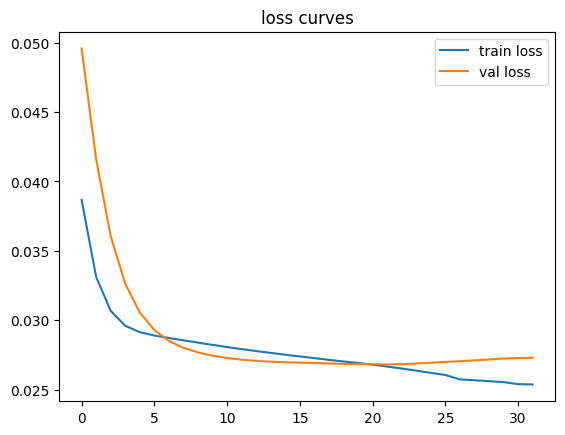

In [92]:
train()

0.011752 0.096459


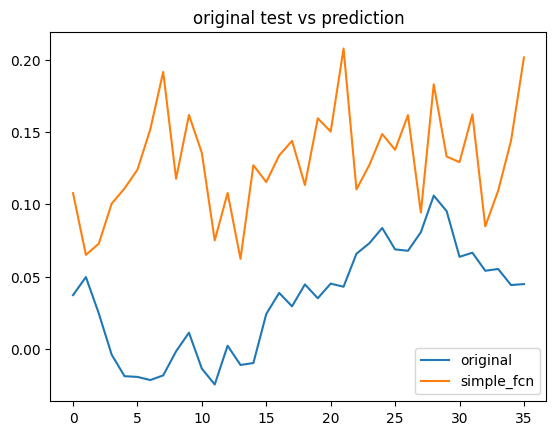

In [93]:
evaluate()

# linear regression - Hei

In [ ]:
from sklearn.linear_model import LinearRegression
start_date = '2023-01-03'
end_date = '2024-01-01'
X = df.loc[start_date:end_date][['Mkt-RF', 'SMB', 'HML']]
y = df.loc[start_date:end_date]['Excess_return']
ff_three_factors_model = LinearRegression().fit(X, y)
ff_three_factors_model.score(X, y)

0.022428398082718015

In [ ]:
test_start = '2023-01-04'
test_end = '2024-03-01'
X_test = df.loc[test_start : test_end][['Mkt-RF', 'SMB', 'HML']]
y_test = df.loc[test_start : test_end]['Excess_return']
print('R^2 score: {}'.format(ff_three_factors_model.score(X_test, y_test)))

R^2 score: -9.044281930026266e-05


In [ ]:
df.loc[test_start : test_end].head()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Risk Free,Daily_return,Excess_return,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,,
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327499,89113600,3.709,0.010261,-0.338813,0.81,0.54,0.05,0.017
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998444,80962700,3.720,-0.010661,-0.337447,-1.14,-0.18,1.21,0.017
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,3.569,0.036133,-0.290365,2.21,-0.06,0.04,0.017
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086517,70790800,3.517,0.004080,-0.274093,0.04,0.55,-1.24,0.017
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.661789,63896200,3.621,0.004447,-0.272496,0.80,0.91,-0.57,0.017


In [ ]:
df.loc[start_date : end_date].head()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Risk Free,Daily_return,Excess_return,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500,3.793,-0.038122,-0.346782,-0.47,0.07,-0.12,0.017
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327499,89113600,3.709,0.010261,-0.338813,0.81,0.54,0.05,0.017
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998444,80962700,3.720,-0.010661,-0.337447,-1.14,-0.18,1.21,0.017
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,3.569,0.036133,-0.290365,2.21,-0.06,0.04,0.017
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086517,70790800,3.517,0.004080,-0.274093,0.04,0.55,-1.24,0.017


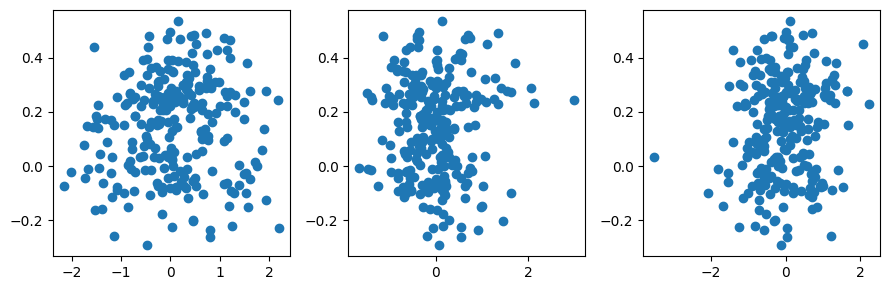

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
for i, feature in enumerate(list(X.columns)):
    axes[i].scatter(X[feature], y)
fig.tight_layout()